# Introduction 

**Overview**

This Exploratory Data Analysis (EDA) is dedicated to an in-depth examination of the DataKind DataKit—a comprehensive, free, and open-source toolkit designed to empower communities and organizations addressing critical social challenges. The DataKit offers:

- **Community-Driven Social Impact Questions**: Curated inquiries sourced directly from communities that require data-driven insights, technological solutions, and compelling storytelling to tackle pressing social issues.
  
- **Expert-Validated Datasets**: A robust collection of meticulously vetted datasets, providing a solid foundation for meaningful analysis and actionable insights.
  
- **Comprehensive Housing Data**: High-quality, accessible housing data available at national, state, and local levels, ensuring a nuanced understanding of housing dynamics across various regions.

**Goals**

This notebook serves as my contribution to the collective effort aimed at generating impactful insights and developing tools to protect tenants from excessive rent increases and prevent arbitrary evictions. By leveraging the resources within the DataKit, this project seeks to address the following four pivotal challenges:

1. **Challenge 1: Understanding Housing Inventory**
   - **Objective**: Analyze the current housing dataset to determine availabile metrics, types, and distribution of within geographical regions.
   - **Impact**: Provides a clear picture of insights, helping to identify gaps and areas of interest.

2. **Challenge 2: Anticipating Household Displacement in Communities**
   - **Objective**: Predict potential areas and populations at risk of displacement due to economic, environmental, or policy-driven factors.
   - **Impact**: Enables proactive measures to protect vulnerable populations and maintain community stability.

3. **Challenge 3: Planning for New Housing Development**
   - **Objective**: Facilitate informed decision-making for future housing projects by assessing community needs, zoning regulations, and market trends.
   - **Impact**: Supports the creation of sustainable and equitable housing solutions that align with community growth and demand.

4. **Challenge 4: Developing Post-Disaster Housing Response**
   - **Objective**: Create strategies for rapid and efficient housing recovery in the aftermath of natural or man-made disasters.
   - **Impact**: Enhances resilience and ensures timely support for affected populations, minimizing long-term displacement and hardship.

Through addressing these challenges, this EDA aims to contribute valuable insights and practical tools that foster equitable housing solutions, safeguard tenant rights, and promote community resilience.

A preliminary exploration of the Florida state data obtained from EODataScape using pandas and visualization libraries.

In [2]:
#import statements
import pandas as pd
import numpy as np

#visualizations
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt



### Exploring EODataScape FLORIDA Data

This is a simple examination of the csv file downloaded from https://eodatascape.datakind.org/explore-data filtered for the state of Florida. The specific data features selected can be seen below. The dataframe was transposed to easily identify all features selected, and the data points, in the following case, are shown at the column level.

In [4]:
#importing data from a download from the datakind pipeline https://eodatascape.datakind.org/explore-data
df = pd.read_csv('data.csv')
df.head(5).T

,0,1,2,3,4
geoid,12001000202,12001000301,12001000700,12001000902,12001001000
geoid_year,2020,2020,2020,2020,2020
state,Florida,Florida,Florida,Florida,Florida
county,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County
state_fips_code,12,12,12,12,12
county_fips_code,1,1,1,1,1
lihtc_qualified_tracts,1,0,1,0,0
housecost_med_est,1100,852,869,738,1198
housecost_med_moe,123,68,110,25,143
housecost_owner_est,563,815,818,-666666666,888


### The data succesfully loaded from the download. Let's first perform a quick sanity check.
The main purpose of this sanity check to to ensure that only data from the selected state has been recorded.

In [6]:
print('')
print('The total number of rows in our table is: ', df.shape[0])
print('The total number of columns in our table is: ', df.shape[1])
print('')
print('-' * 75)
print('')
unique_states = df['state'].unique()
unique_years = df['geoid_year'].unique()
print('The target state is: ', unique_states)
print('')
print('=' * 75)
print('')
print('The number of STATE rows with missing data is: ', df['state'].isnull().sum())
print('The total number of COUNTIES observed is: ', df['county'].nunique())
print('The number of COUNTIES rows with missing data is: ', df['county'].isnull().sum())
print('')
print('=' * 75)
print('')
print('The date range for this data covers the following year(s): ' ,unique_years)
print('')


The total number of rows in our table is:  5160
The total number of columns in our table is:  52

---------------------------------------------------------------------------

The target state is:  [' Florida']


The number of STATE rows with missing data is:  0
The total number of COUNTIES observed is:  67
The number of COUNTIES rows with missing data is:  0


The date range for this data covers the following year(s):  [2020]



We confirmed that:
 - Florida is the only state within the data set
 - There are 67 counties in total for the data set, which aligns with US Censue  results: https://www.census.gov/geographies/reference-files/2010/geo/state-local-geo-guides-2010/florida.html#:~:text=There%20are%2067%20counties%20in,by%20the%20city%20of%20Jacksonville.
 - The STATE and COUNTY columns have no missing data

To display the df.info output, expand the below:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   geoid                    5160 non-null   int64  
 1   geoid_year               5160 non-null   int64  
 2   state                    5160 non-null   object 
 3   county                   5160 non-null   object 
 4   state_fips_code          5160 non-null   int64  
 5   county_fips_code         5160 non-null   int64  
 6   lihtc_qualified_tracts   5160 non-null   int64  
 7   housecost_med_est        5160 non-null   int64  
 8   housecost_med_moe        5160 non-null   int64  
 9   housecost_owner_est      5160 non-null   int64  
 10  housecost_owner_moe      5160 non-null   int64  
 11  housecost_rent_est       5160 non-null   int64  
 12  housecost_rent_moe       5160 non-null   int64  
 13  med_hh_inc_est           5160 non-null   int64  
 14  med_hh_inc_moe          

To display the df.describe statistical output, expand below:

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
geoid,5160.0,1.207178e+10,3.595191e+07,1.200100e+10,1.203902e+10,1.208600e+10,1.209901e+10,1.213397e+10
geoid_year,5160.0,2.020000e+03,0.000000e+00,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03
state_fips_code,5160.0,1.200000e+01,0.000000e+00,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
county_fips_code,5160.0,7.169244e+01,3.593853e+01,1.000000e+00,3.900000e+01,8.600000e+01,9.900000e+01,1.330000e+02
lihtc_qualified_tracts,5160.0,1.777132e-01,3.823082e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
housecost_med_est,5160.0,-1.369375e+07,9.457418e+07,-6.666667e+08,1.007000e+03,1.296500e+03,1.612000e+03,4.001000e+03
housecost_med_moe,5160.0,-5.017021e+06,3.376735e+07,-3.333333e+08,1.110000e+02,1.660000e+02,2.550000e+02,1.835000e+03
housecost_owner_est,5160.0,-2.777655e+07,1.332307e+08,-6.666667e+08,8.110000e+02,1.156000e+03,1.556250e+03,4.001000e+03
housecost_owner_moe,5160.0,-1.029256e+07,4.792340e+07,-3.333333e+08,1.460000e+02,2.360000e+02,3.750000e+02,2.473000e+03
housecost_rent_est,5160.0,-5.141977e+07,1.778846e+08,-6.666667e+08,1.103000e+03,1.405000e+03,1.762250e+03,3.501000e+03


## Expected Missing NaN Data Occurences

Median Property Value is missing 89 records, and 83 records is missing from 
- Median Mortgage Loan, 
- Number of Morgage Loans, 
- Number of Mortgage Denials, and 
- Number of Mortgage Origins.



To view the method used to sub set the dataframe df to explore the NaN data, expand below:

In [12]:
df_null = df[['med_mortgage_loan','med_property_value','num_mortgage_loans','num_mortgage_denials','num_mortgages_origin']].isnull()
missing_data = df[df_null.any(axis=1)]
missing_data_filtered = missing_data[['med_mortgage_loan','med_property_value','num_mortgage_loans','num_mortgage_denials','num_mortgages_origin']]
missing_data_filtered.head()

,med_mortgage_loan,med_property_value,num_mortgage_loans,num_mortgage_denials,num_mortgages_origin
75,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN
346,NaN,NaN,NaN,NaN,NaN


## Interpreting JAM Values as N/A vs NaN Data Occurences

As we can see from the above, there are actual missing values in the data set. The number of missing values are small enough that it should not interfere with analysis of the data. However, the data does use negative values with repeating schemes to represent 'Jam Values'.

### Understanding Jam Values

The Census Department utilizes specific negative values to represent cases where the sample is too small, non-computational entries, not applicable or not available data, as well as data being treated as zero. A detailed breakdown can be found here: https://www2.census.gov/programs-surveys/acs/tech_docs/jam_values/2022_Jam_Values.xlsx

For example, if we were to look at one feature in our dataset, med_inc_ai_an_moe, and display the output:

In [166]:
df[['med_inc_asian_est','geoid','county']].head(10).T

,0,1,2,3,4,5,6,7,8,9
med_inc_asian_est,-666666666,-666666666,-666666666,2499,-666666666,-666666666,43567,-666666666,130703,-666666666
geoid,12001000202,12001000301,12001000700,12001000902,12001001000,12001001515,12001001517,12001001702,12001001813,12001001817
county,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County


The feature, med_inc_asian_est, represents 
- ACS - Median Household Income last 12 months (in 2022 Inflation-Adjusted Dollars) - By Race of Householder - Asian - Estimate
- The value, -666666666, is used to represent that the estimate was not computed due to insufficient number of sample cases.

According to the data dictionary provided. We can see that we have a sequence of negative numbers with repeating patterns, in this case, -666666666.  In this case, it means that for the associated county/geoid, there were no Asians represented at the time the data was collected. We can estrapolate this out further to understand the diversity of specific counties and GEOID tracts as we evaluate the data.

### Managing Jam Values

The current governance of Jam values does limit how we will interpret some of the data. In some cases, we may want to replace the negative Jam values while performing statiscal or other types of analysis. One option explored was to replace the jam values with 0, HOWEVER, this is not to substitute replace the meaning of the Jam value, it is ONLY TO PERFORM ANALYTICAL MEASUREMENTS.

We do not equate the '0' replacement Jam values, with existing usages of '0' in the data set. For example. we see that the following three features, uses 0, as values:
- lihtc_qualified_tracts
- num_mortgage_denials
- num_mortgages_origin

With that in mind, we must be cognizant when to use the Jam values, and when to modify the values for analysis.

In [27]:
# the following code was used to find existing '0' value entries in the data set
zero_mask = df == 0
# find columns that has at least one zero value
columns_with_zeros = df.loc[:, zero_mask.any(axis=0)]
print(columns_with_zeros.columns)

Index(['lihtc_qualified_tracts', 'num_mortgage_denials',
       'num_mortgages_origin'],
      dtype='object')


### Droping NaN Rows and Zeroing Jam Values
In the following, let's create a subset dataframe that removes NaN rows and replaces the negative values with 0s

In [29]:
# dropping the na rows
df_subset = df.dropna()
# excluding my features that are objects.strings
exclude_columns = ['state', 'county']
numerical_df = df_subset.select_dtypes(include=[np.number]).drop(columns=exclude_columns, errors='ignore')
# setting my negatives to the value of 0
numerical_df = numerical_df.clip(lower=0)
# cmbining back to my df_dropped df
df_subset.loc[:, numerical_df.columns] = numerical_df
# printing 
df_subset.head(5).T

,0,1,2,3,4
geoid,12001000202,12001000301,12001000700,12001000902,12001001000
geoid_year,2020,2020,2020,2020,2020
state,Florida,Florida,Florida,Florida,Florida
county,Alachua County,Alachua County,Alachua County,Alachua County,Alachua County
state_fips_code,12,12,12,12,12
county_fips_code,1,1,1,1,1
lihtc_qualified_tracts,1,0,1,0,0
housecost_med_est,1100,852,869,738,1198
housecost_med_moe,123,68,110,25,143
housecost_owner_est,563,815,818,0,888


Sanity check to make sure no negative values are present. Expand below for results to see that there are 0 entires with negative values.

In [31]:
# checking to make sure no negative numbers remained
print(numerical_df[numerical_df < 0].sum())

geoid                      0.0
geoid_year                 0.0
state_fips_code            0.0
county_fips_code           0.0
lihtc_qualified_tracts     0.0
housecost_med_est          0.0
housecost_med_moe          0.0
housecost_owner_est        0.0
housecost_owner_moe        0.0
housecost_rent_est         0.0
housecost_rent_moe         0.0
med_hh_inc_est             0.0
med_hh_inc_moe             0.0
med_inc_white_est          0.0
med_inc_white_moe          0.0
med_inc_black_est          0.0
med_inc_black_moe          0.0
med_inc_ai_an_moe          0.0
med_inc_ai_an_est          0.0
med_inc_asian_est          0.0
med_inc_asian_moe          0.0
med_inc_nhopi_est          0.0
medi_inc_nhopi_moe         0.0
med_inc_other_race_est     0.0
med_inc_other_race_moe     0.0
med_inc_2plus_races_est    0.0
med_inc_2plus_races_moe    0.0
med_inc_hisp_est           0.0
med_inc_hisp_moe           0.0
med_inc_white_nh_est       0.0
med_inc_white_nh_moe       0.0
med_inc_age_15_24_est      0.0
med_inc_

In [240]:
# reconfirming size of dataframe
df_dropped.shape

(5071, 52)

# Simple Visualizations

A simple exploration of our modified data set to explore some straightforward use cases

## Income Diverity by Sex and Race

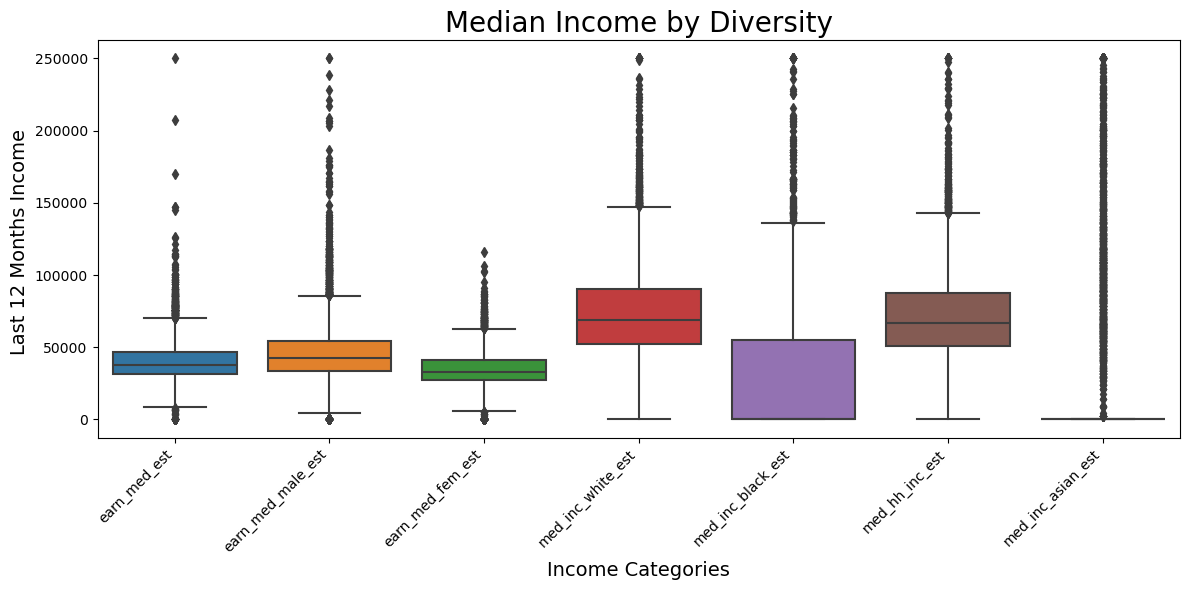

In [72]:
visuals = df_subset
general_income_mask = ['earn_med_est','earn_med_male_est', 'earn_med_fem_est','med_inc_white_est','med_inc_black_est', 'med_hh_inc_est', 'med_inc_asian_est']
plt.figure(figsize=(12,6))
sns.boxplot(data=visuals[general_income_mask], showfliers=True)


plt.title('Median Income by Diversity', fontsize=20)
plt.xlabel('Income Categories', fontsize=14)
plt.ylabel('Last 12 Months Income ', fontsize=14)
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [37]:
# sanity check to find the max values of each feature
max_values = visuals[general_income_mask].max()
print(max_values)

earn_med_est         250001
earn_med_male_est    250001
earn_med_fem_est     115788
med_inc_white_est    250001
med_inc_black_est    250001
med_hh_inc_est       250001
med_inc_asian_est    250001
dtype: int64


### Analysis of the Box Plot: "Median Income by Diversity"

This box plot visualizes the distribution of median income across various demographic categories, focusing on gender, race, and ethnicity. The plot highlights disparities in median income among different groups.

### Detailed Observations:

1. **Axes:**
   - **X-Axis (Income Categories):** The plot shows various demographic categories:
     - `earn_med_est`: Median income for all individuals.
     - `earn_med_male_est`: Median income for males.
     - `earn_med_fem_est`: Median income for females.
     - `med_inc_white_est`: Median income for White individuals.
     - `med_inc_black_est`: Median income for Black individuals.
     - `med_hh_inc_est`: Median income for Hispanic households.
     - `med_inc_asian_est`: Median income for Asian individuals.
   
   - **Y-Axis (Last 12 Months Income):** Ranges from $0 to $250,000, showing the distribution of income levels within each group.

2. **Key Insights:**
   - **Gender Disparities:**
     - Males (`earn_med_male_est`) have a higher median income than females (`earn_med_fem_est`), indicating a persistent gender income gap.
     - The distribution for males shows more variability, with numerous high-income outliers, suggesting that men have more opportunities to achieve higher earnings compared to women.

   - **Racial and Ethnic Disparities:**
     - **Asian Individuals (`med_inc_asian_est`)**: This group shows the highest median income among all the categories, with a wide range of incomes, reflecting both high earning potential and variability within the group.
     - **White Individuals (`med_inc_white_est`)**: The median income for White individuals is relatively high and also shows a broad spread, indicating considerable income diversity.
     - **Black Individuals (`med_inc_black_est`)**: Black individuals have the lowest median income among the racial groups shown, with a narrower interquartile range, suggesting limited income mobility and fewer high earners within this group.
     - **Hispanic Households (`med_hh_inc_est`)**: Hispanic households show median incomes that are higher than Black individuals but lower than White and Asian groups, reflecting intermediate income levels among the categories.

3. **Distribution Patterns:**
   - **Income Variability:**
     - Most categories exhibit significant variability, particularly among Asian and White groups, where outliers extend far above the upper quartile, indicating that some individuals within these groups earn substantially more than the median.
     - The overall income spread is narrower for females and Black individuals, suggesting limited high-income opportunities.

4. **Comparative Insights:**
   - The data clearly highlights systemic income inequalities across gender and racial lines. Males earn more than females, and there is a notable income hierarchy among racial groups, with Asians earning the most and Black individuals earning the least.
   - The presence of numerous high-income outliers among Whites and Asians suggests that while median incomes provide a general view, the full range of earnings includes individuals who achieve significantly higher incomes.

### Conclusions:

1. **Persistent Gender and Racial Income Gaps:**
   - The data underscores persistent income disparities, with males earning more than females and notable differences among racial groups. These disparities reflect broader socio-economic challenges and structural inequalities in access to high-paying jobs.

2. **Economic Challenges for Black and Hispanic Households:**
   - Black and Hispanic households face lower median incomes compared to Whites and Asians, pointing to the need for targeted economic policies and programs that support income growth and reduce inequality.

3. **Significant Income Variability Within Groups:**
   - High variability within the Asian and White groups indicates that while many individuals earn high incomes, others within these demographics still face economic challenges. This variability reflects a wide distribution of wealth and economic opportunity within these groups.

4. **Policy Implications:**
   - The observed income disparities suggest the need for comprehensive policy interventions aimed at closing gender and racial income gaps, improving access to education and high-paying careers for underrepresented groups, and fostering inclusive economic growth.

Overall, this analysis highlights significant income disparities across demographic groups, emphasizing the importance of addressing these inequities to ensure that all individuals have equitable access to economic opportunities. Addressing these gaps is crucial for promoting a fair and inclusive society where income is less dependent on gender or race.

## Income Diversity by Age

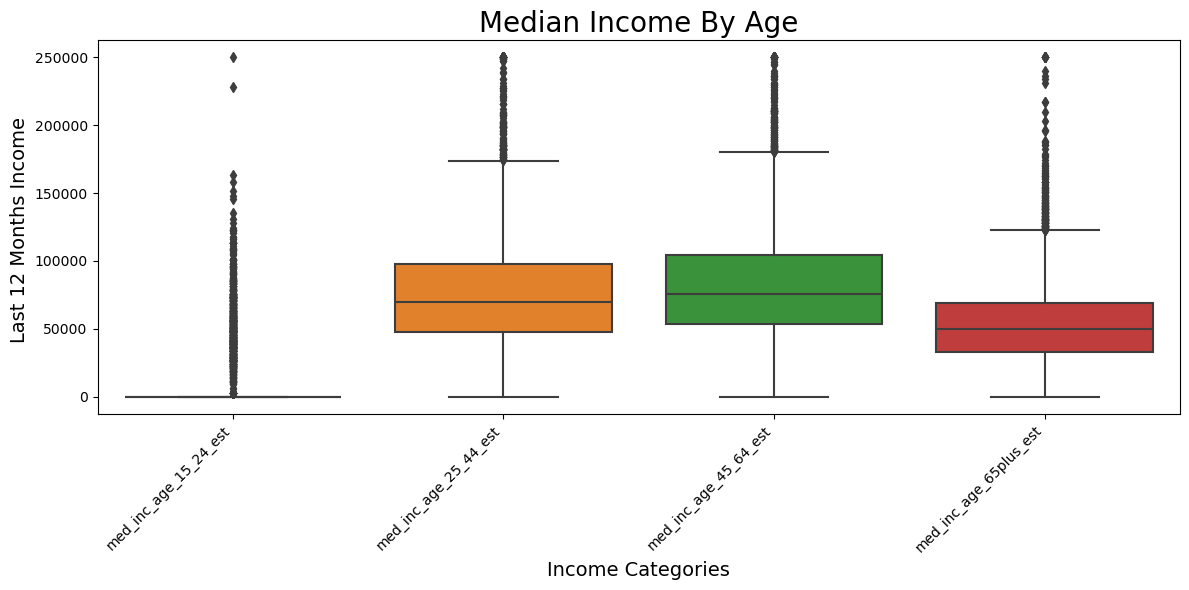

In [74]:
visuals = df_subset
age_income_mask = ['med_inc_age_15_24_est','med_inc_age_25_44_est','med_inc_age_45_64_est','med_inc_age_65plus_est']
plt.figure(figsize=(12,6))
sns.boxplot(data=visuals[age_income_mask], showfliers=True)


plt.title('Median Income By Age', fontsize=20)
plt.xlabel('Income Categories', fontsize=14)
plt.ylabel('Last 12 Months Income ', fontsize=14)
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

### Analysis of the Box Plot: "Median Income By Age"

This box plot illustrates the distribution of median income across different age groups, highlighting how income varies throughout different stages of life.

### Detailed Observations:

1. **Axes:**
   - **X-Axis (Income Categories):** Represents different age groups:
     - `med_inc_age_15_24_est`: Median income for individuals aged 15 to 24.
     - `med_inc_age_25_44_est`: Median income for individuals aged 25 to 44.
     - `med_inc_age_45_64_est`: Median income for individuals aged 45 to 64.
     - `med_inc_age_65plus_est`: Median income for individuals aged 65 and older.
   
   - **Y-Axis (Last 12 Months Income):** Shows income levels ranging from $0 to $250,000.

2. **Key Insights:**
   - **Young Adults (15-24 years):**
     - This age group has the lowest median income, which is expected as many are still in school, working entry-level jobs, or part-time positions.
     - There are several high-income outliers, indicating that while most individuals in this group earn lower wages, a small number achieve significantly higher earnings, potentially from high-paying early career roles or entrepreneurship.

   - **Adults (25-44 years):**
     - This group shows a noticeable increase in median income, representing the primary career-building years where individuals gain experience and climb the job ladder.
     - The interquartile range is broad, indicating diverse income levels within this group, which can be attributed to different career stages, industries, and educational backgrounds.

   - **Middle-Aged Adults (45-64 years):**
     - This group has a similar or slightly higher median income compared to the 25-44 age group, reflecting continued professional growth and stability.
     - The distribution remains wide, with many high-income earners, reflecting that this is often the peak earning phase of life due to seniority, advanced roles, and accumulated experience.

   - **Seniors (65+ years):**
     - The median income drops significantly for this group, reflecting retirement and a shift from earned income to retirement funds, pensions, or social security.
     - The variability is less pronounced compared to working-age groups, but there are some high-income outliers, likely due to individuals who continue working, receive substantial retirement benefits, or have significant investment income.

3. **Distribution Patterns:**
   - **Income Growth with Age:**
     - The plot follows the typical income trajectory: starting low in youth, peaking in middle age, and declining during retirement.
   - **Outliers in Youth and Seniors:**
     - The presence of high-income outliers among the youngest and oldest groups indicates exceptions where individuals achieve atypical financial success compared to their peers.

4. **Comparative Insights:**
   - Income generally rises through early and mid-adulthood as individuals progress in their careers. The highest earnings are observed in the 25-64 age range, while income declines significantly after age 65, emphasizing the financial impact of retirement.

### Conclusions:

1. **Peak Earning Years are Midlife:**
   - The 25-64 age groups show the highest median incomes, highlighting this period as the peak of earning potential due to career advancement, experience, and senior roles.

2. **Economic Challenges for Young Adults and Seniors:**
   - The lowest median incomes are observed in the 15-24 and 65+ groups, reflecting the economic challenges faced by young adults entering the workforce and older adults transitioning out of it.

3. **Significant Income Variability in Working Ages:**
   - The broad spread within the 25-64 groups suggests diverse economic outcomes, influenced by factors like education, career choices, and industry variability.

4. **Importance of Retirement Planning:**
   - The decline in income for the 65+ age group underscores the importance of financial planning throughout one's career to ensure economic security in retirement.

Overall, the analysis reflects a typical earnings lifecycle, highlighting the need for targeted financial planning and support for young adults and seniors to ensure financial stability throughout life stages.

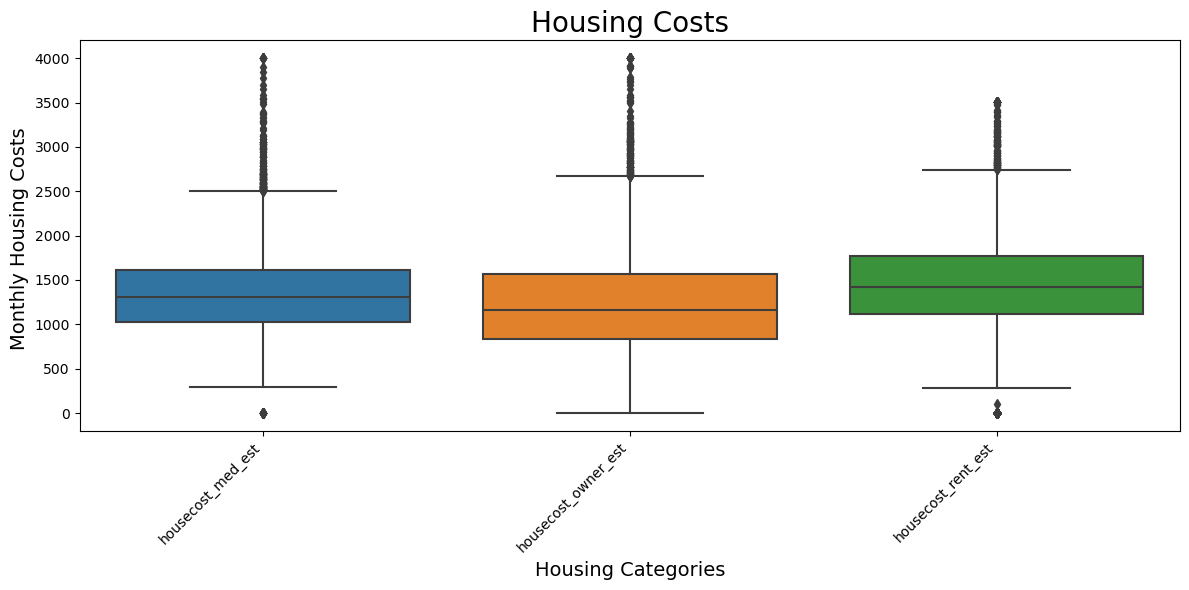

In [77]:
visuals = df_subset
housing_mask = ['housecost_med_est','housecost_owner_est','housecost_rent_est']
plt.figure(figsize=(12,6))
sns.boxplot(data=visuals[housing_mask], showfliers=True)


plt.title('Housing Costs', fontsize=20)
plt.xlabel('Housing Categories', fontsize=14)
plt.ylabel('Monthly Housing Costs ', fontsize=14)
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

### **Axes and Labels:**
- **Y-Axis:** Represents the monthly housing costs, ranging from 0 to above 4,000.
- **X-Axis:** Represents different housing categories labeled as "Housing Categories."

### **Housing Cost Categories:**
The x-axis includes the following categories:
1. **housecost_med_est:** Median estimated monthly housing costs, potentially representing a general average across all types.
2. **housecost_owner_est:** Estimated monthly housing costs for homeowners.
3. **housecost_rent_est:** Estimated monthly housing costs for renters.

### **Analysis of Each Housing Category:**
1. **General Observations:**
   - Each boxplot shows the spread, median, interquartile range (IQR), and outliers of the housing cost data.
   - The boxes represent the IQR (25th to 75th percentile), with the line inside each box indicating the median. Whiskers extend to the most extreme non-outlier data points.

2. **Specific Observations:**
   - **housecost_med_est:**
     - This category shows a median housing cost of around 1,500. 
     - There is a wide spread of data with a significant number of outliers above 3,000, suggesting some households have substantially higher costs compared to the majority.
     - The range of typical housing costs extends from near 0 to about 2,500.
   
   - **housecost_owner_est:**
     - This category represents the housing costs for homeowners and has a slightly higher median compared to the general estimate.
     - The spread is broader, with outliers extending past 4,000, indicating that some homeowners face very high monthly costs, likely influenced by mortgage payments, property taxes, or maintenance costs.
     - The lower whisker extends close to zero, suggesting some homeowners have minimal monthly costs, likely those without mortgages.
   
   - **housecost_rent_est:**
     - This category shows a similar median to the general estimate, but with a slightly tighter interquartile range.
     - Outliers extend significantly above 3,000, highlighting that while the majority of rents fall within a predictable range, there are notable cases of extremely high rental costs.
     - The lower whisker is also near zero, indicating that some rental units are very low-cost, possibly due to subsidies, shared housing, or specific market conditions.

### **Conclusions:**
- **High Cost Variability:** There is significant variability in monthly housing costs across all categories, with many outliers indicating that both very low and very high costs exist within each group.
- **Owner vs. Renter Costs:** Homeowners tend to have a broader spread and slightly higher costs compared to renters, reflecting the diverse expenses associated with owning a home, including mortgages, maintenance, and property taxes.
- **Outliers Indicate High-Cost Cases:** The presence of outliers in each category suggests that certain households face significantly higher costs, possibly influenced by location, housing type, or market conditions.


## Testing out GEOID using census data provided by US government

Providing maps for some of our data visualizations may prove to be helpful for some of the upcoming challenges, in addition to other visualizations other contributors will provide. In order to ensure that our data GEOID fields are valid, I obtained publicly available tract files for data mapping at https://data.census.gov/

### Simple Visualization of GEOID Data

Before committing to providing possible map solutions to some of the challenges, lets confirm that the data provided can be used by using GEO Pandas to plot a simple tract from one Florida county.

In [114]:
#path to shapefile
shapefile_path = 'tl_2020_12001_tract10.shp'
#reading in shapfile using GeoPandas
tracts = gpd.read_file(shapefile_path)
#testing with GEOID selected from df.head()
# Print all column names to verify
print("Columns in the shapefile:", tracts.columns.tolist())
test_tract = tracts[tracts['GEOID10'] == '12001000700']
# Check if the tract exists
if test_tract.empty:
    print("GEOID not found in the shapefile.")
else:
    # Display information about the tract
    print(test_tract)

Columns in the shapefile: ['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10', 'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'geometry']
   STATEFP10 COUNTYFP10 TRACTCE10      GEOID10 NAME10    NAMELSAD10 MTFCC10  \
10        12        001    000700  12001000700      7  Census Tract   G5020   

   FUNCSTAT10   ALAND10  AWATER10   INTPTLAT10    INTPTLON10  \
10          S  22417196    457315  +29.6280432  -082.2957817   

                                             geometry  
10  POLYGON ((-82.32755 29.63571, -82.32729 29.636...  


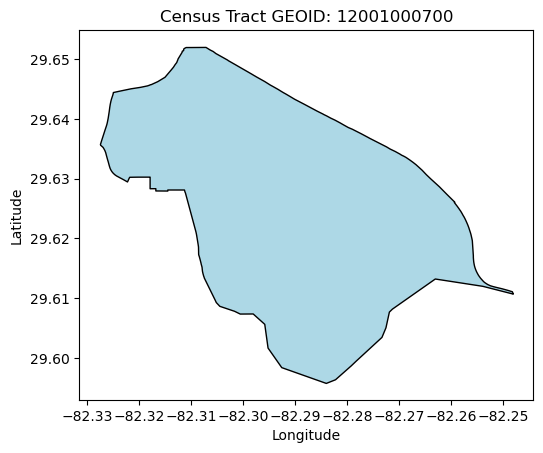

In [116]:
# Plot the specific Census Tract
test_tract.plot(edgecolor='black', color='lightblue')
plt.title('Census Tract GEOID: 12001000700')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()